# Assignment 1. Data Manipulation and Visualization  

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For your questions refer to asoleix@gmail.com or @amirsoleix on Telegram*

### Description
In this homework you are supposed to get comfortable (or make sure that you are!) with the basic Python tools frequently used in data science.  

### Information  
Complete the information box below.

In [9]:
full_name = 'Ali Nikkhah'
student_id = '99102445'

In [47]:
# Import all your libraries here
!pip install --upgrade pip
!pip install lxml
!pip install xlrd
!pip install numpy
!pip install plotly

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date, datetime


## 1. Another LEGO brick in the wall
LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following diagram.

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
* Load your data into `Pandas`  

* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### 1.1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

In [11]:
# Specify the path to the "data/lego" directory
data_directory = "data/lego"

# List the CSV files in the directory
csv_files = [file for file in os.listdir(data_directory) if file.endswith('.csv')]

# Create a dictionary to store DataFrames with meaningful names
dataframes = {}

# Load CSV files into DataFrames and use filenames as DataFrame names
for file in csv_files:
    # Create the full file path
    file_path = os.path.join(data_directory, file)
    # Extract the filename without the ".csv" extension
    df_name = os.path.splitext(file)[0]
    dataframes[df_name] = pd.read_csv(file_path)
for df_name, df in dataframes.items():
    print(f"DataFrame Name: {df_name}")
    print(f"Dimensions (rows, columns): {df.shape}")
    df.info()
    df.describe()
    print("=" * 50)  # Add a separator for clarity
    

DataFrame Name: part_categories
Dimensions (rows, columns): (57, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      57 non-null     int64 
 1   name    57 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
DataFrame Name: inventories
Dimensions (rows, columns): (11681, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11681 entries, 0 to 11680
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       11681 non-null  int64
 1   version  11681 non-null  int64
dtypes: int64(2)
memory usage: 182.6 KB
DataFrame Name: parts
Dimensions (rows, columns): (25993, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25993 entries, 0 to 25992
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           25993 no

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


### 1.2. Cleaning phase
Explore the following columns from your dataset:

* sets: year  

* inventory_parts: quantity  
  
Answer the following questions using data visualizations and manipulations. The code for this part is required alongside your explanations either in comments or markdown.  
1. What is the time range of the sets?  

2. What is the average quantity of the inventory parts? 
3. Do you see any inconsistencies? 
4. Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

**What is the time range of the sets?**

We can find the time range by analyzing the "year" column in the "sets" DataFrame.

In [12]:
# Finding the time range of the sets
min_year = dataframes["sets"]["year"].min()
max_year = dataframes["sets"]["year"].max()
print(f"Time Range of Sets: {min_year} to {max_year}")
print(dataframes["sets"]["year"])


Time Range of Sets: -1962 to 80s
0          70s
1         1978
2         1987
3         1979
4         1979
         ...  
11668    -2012
11669    -2015
11670     2010
11671    -2013
11672     1996
Name: year, Length: 11673, dtype: object


**What is the average quantity of the inventory parts?**

We can calculate the average quantity of inventory parts in the "inventory_parts" DataFrame.

In [13]:
# Calculate the average quantity of inventory parts
average_quantity = dataframes["inventory_parts"]["quantity"].mean()
print(f"Average Quantity of Inventory Parts: {average_quantity:.2f}")
print(dataframes["inventory_parts"]["quantity"])

Average Quantity of Inventory Parts: -inf
0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
580246    3.0
580247    4.0
580248    4.0
580249    9.0
580250    5.0
Name: quantity, Length: 580251, dtype: float64


**Do you see any inconsistencies?**

To identify inconsistencies, you can check for missing values and outliers. For example, you can check if there are any sets with a year outside the expected range, or if there are any negative quantities of parts.

In [14]:
# Convert the "year" column to numeric (integer) type
dataframes["sets"]["year"] = pd.to_numeric(dataframes["sets"]["year"], errors='coerce')

# Check for inconsistent years in sets
inconsistent_years = dataframes["sets"][(dataframes["sets"]["year"] < 1900) | (dataframes["sets"]["year"] > 2023)]
if not inconsistent_years.empty:
    print("Inconsistent Years in Sets:")
    print(inconsistent_years)



Inconsistent Years in Sets:
                  id                                               name  \
7             0016-1                                Castle Mini Figures   
30           10005-1                              2 x 4 Sand Red Bricks   
50           10022-1  Santa Fe Cars - Set II (dining, observation, o...   
55           10027-1                                  Train Engine Shed   
56           10029-1                                       Lunar Lander   
...              ...                                                ...   
11663     VPorient-1  Orient Expedition Value Pack with LEGO Backpac...   
11667      Watford-1  LEGO Store Grand Opening Exclusive Set, Watfor...   
11668    Wauwatosa-1  LEGO Store Grand Opening Exclusive Set, Mayfai...   
11669   WHITEHOUSE-1                                  Micro White House   
11671  WishingWell-1                     Wishing Well [Toys R Us Promo]   

          year  theme_id  num_parts  
7      19788.0       186         

*Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset  in field of year and quantity.*


**Detect and Clean Inconsistencies in the "year" Field:**

Convert the "year" column to numeric, as explained earlier, to handle cases where years are in string format.
Identify and remove any rows with inconsistent years that fall outside a reasonable range (e.g., 1900 to 2023) or are NaN.

**Detect and Clean Inconsistencies in the "quantity" Field:**

Identify and remove rows with inconsistent quantities that are negative.


In [15]:
# Convert the "year" column to numeric (integer) type
dataframes["sets"]["year"] = pd.to_numeric(dataframes["sets"]["year"], errors='coerce')

# Detect and remove inconsistent years
dataframes["sets"] = dataframes["sets"][
    (dataframes["sets"]["year"] >= 1900) & (dataframes["sets"]["year"] <= 2023)
]
# Detect and remove rows with negative quantities in inventory parts
dataframes["inventory_parts"] = dataframes["inventory_parts"][
    dataframes["inventory_parts"]["quantity"] >= 0
]


**Validation of Data Coherence:**

In [16]:
# Validate the coherence of the "year" field in the "sets" DataFrame
year_stats = dataframes["sets"]["year"].info()
year_stats = dataframes["sets"]["year"].describe()

# Validate the coherence of the "quantity" field in the "inventory_parts" DataFrame
quantity_stats = dataframes["inventory_parts"]["quantity"].info()
quantity_stats = dataframes["inventory_parts"]["quantity"].describe()

print("Summary Statistics for 'year' in 'sets' DataFrame:")
print(year_stats)
print("\nSummary Statistics for 'quantity' in 'inventory_parts' DataFrame:")
print(quantity_stats)




<class 'pandas.core.series.Series'>
Index: 8588 entries, 1 to 11672
Series name: year
Non-Null Count  Dtype  
--------------  -----  
8588 non-null   float64
dtypes: float64(1)
memory usage: 134.2 KB
<class 'pandas.core.series.Series'>
Index: 418455 entries, 0 to 580250
Series name: quantity
Non-Null Count   Dtype  
--------------   -----  
418455 non-null  float64
dtypes: float64(1)
memory usage: 6.4 MB
Summary Statistics for 'year' in 'sets' DataFrame:
count    8588.000000
mean     2000.272357
std        14.124189
min      1950.000000
25%      1993.000000
50%      2004.000000
75%      2011.000000
max      2017.000000
Name: year, dtype: float64

Summary Statistics for 'quantity' in 'inventory_parts' DataFrame:
count    418455.000000
mean          3.836938
std           9.642451
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        1440.000000
Name: quantity, dtype: float64


**Re calculation of MEAN and RANGE using cleaned data**

In [17]:
# Finding the time range of the sets
min_year = dataframes["sets"]["year"].min()
max_year = dataframes["sets"]["year"].max()
print(f"Time Range of Sets: {min_year} to {max_year}")
print(dataframes["sets"]["year"])
# Calculate the average quantity of inventory parts
average_quantity = dataframes["inventory_parts"]["quantity"].mean()
print(f"Average Quantity of Inventory Parts: {average_quantity:.2f}")
print(dataframes["inventory_parts"]["quantity"])

Time Range of Sets: 1950.0 to 2017.0
1        1978.0
2        1987.0
3        1979.0
4        1979.0
5        1979.0
          ...  
11664    1959.0
11665    2006.0
11666    2009.0
11670    2010.0
11672    1996.0
Name: year, Length: 8588, dtype: float64
Average Quantity of Inventory Parts: 3.84
0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
580246    3.0
580247    4.0
580248    4.0
580249    9.0
580250    5.0
Name: quantity, Length: 418455, dtype: float64


**Explain your approach and assumptions once this section is completed.**

Based on the provided output, here's an explanation of the approach and the results:

Time Range of Sets:

The code first calculated the time range of the "sets" DataFrame by examining the "year" column. It found that the dataset covers the years from 1950.0 to 2017.0. Additionally, it removed rows with inconsistent years, such as those that fall outside the range or are in an inappropriate format (e.g., non-numeric or NaN).

Average Quantity of Inventory Parts:

The code then calculated the average quantity of inventory parts in the "inventory_parts" DataFrame. The average quantity is 3.84, indicating the average number of parts in inventory for the given data.

Assumptions:

The time range of the "sets" dataset is determined by the range of years, and it was assumed that years outside the range of 1950 to 2017 were inconsistent or irrelevant to the analysis.
The "quantity" values in the "inventory_parts" dataset were expected to be non-negative, and any negative values were considered inconsistent and removed.
The code assumes that the cleaned data (after removing inconsistencies) is more suitable for further analysis and that removing or converting inconsistent data was a valid approach in this context.

### 1.3. Querying phase
Answer the following queries using the functionality of `Pandas`:

* List the IDs of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).  

* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).  

* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.  

* Create a scatter plot of the **luminance** of the sets vs their publishing year. After it is done, briefly answer the following questions:
  1. Do you see a trend over the last years?  
  
  2. How do you interpret it?

The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

**1. List the IDs of the inventories that belong to sets that contain cars:**

We can identify sets that contain cars based on the sets' names and then list the inventory IDs.

In [18]:
car_sets = dataframes["sets"][dataframes["sets"]["name"].str.contains(r'\bcar\b', case=False, regex=True)]
#Using this regex expression we print explecitly name Car
# Extract IDs from car_sets DataFrame
car_set_ids = car_sets["id"]
car_inventoryset_ids = dataframes["inventory_sets"][dataframes["inventory_sets"]["set_id"].isin(car_set_ids)]
car_inventory_ids=car_inventoryset_ids['inventory_id']
# Find the corresponding inventory IDs for these car sets in the inventories DataFrame
car_inventory_data = dataframes["inventories"][dataframes["inventories"]["id"].isin(car_inventory_ids)]
print('names that contain name car are:')
print(car_sets)
#print('ids of names that contain name car are: \n \n \n ')
#print(car_set_ids)
#print('set ids that contain name car are: \n \n \n ')
#print(car_inventoryset_ids)
print('*'*70)
print('inventory ids that contain name car are:')
print(car_inventory_data)
print('*'*70)

names that contain name car are:
             id                                         name    year  \
27      10002-1                            Railroad Club Car  2001.0   
53      10025-1  Santa Fe Cars - Set I (mail or baggage car)  2002.0   
142     10158-1                         High Speed Train Car  2004.0   
154     10170-1              TTX Intermodal Double-Stack Car  2005.0   
182     10200-1                            Custom Car Garage  2008.0   
...         ...                                          ...     ...   
9569   850953-1                         Police Car Bag Charm  2014.0   
10117   8803-11               Race Car Driver - Complete Set  2011.0   
10281    8865-1                                     Test Car  1988.0   
10296    8880-1                                    Super Car  1994.0   
10740    9685-1                                Green Car Set  2003.0   

       theme_id  num_parts  
27          233        272  
53          237        325  
142         239


**2. Plot the distribution of part categories:**

To plot the distribution of part categories, we can group the data by part categories, count the number of parts in each category, and then plot the top 20 categories.

name_y
Minifigs                                    8556
Minifig Accessories                         2071
Non-LEGO                                    1964
Duplo, Quatro and Primo                     1552
Tiles Printed                               1191
Other                                       1125
Bionicle, Hero Factory and Constraction     1116
Bricks Printed                               744
Plants and Animals                           742
Power Functions, Mindstorms and Electric     462
Flags, Signs, Plastics and Cloth             428
Bricks Sloped                                410
Transportation - Land                        409
Windows and Doors                            405
Clikits                                      278
Bricks Curved                                275
Wheels and Tyres                             270
Windscreens and Fuselage                     268
Baseplates                                   250
Belville, Scala and Fabuland                 234
Name: count, 

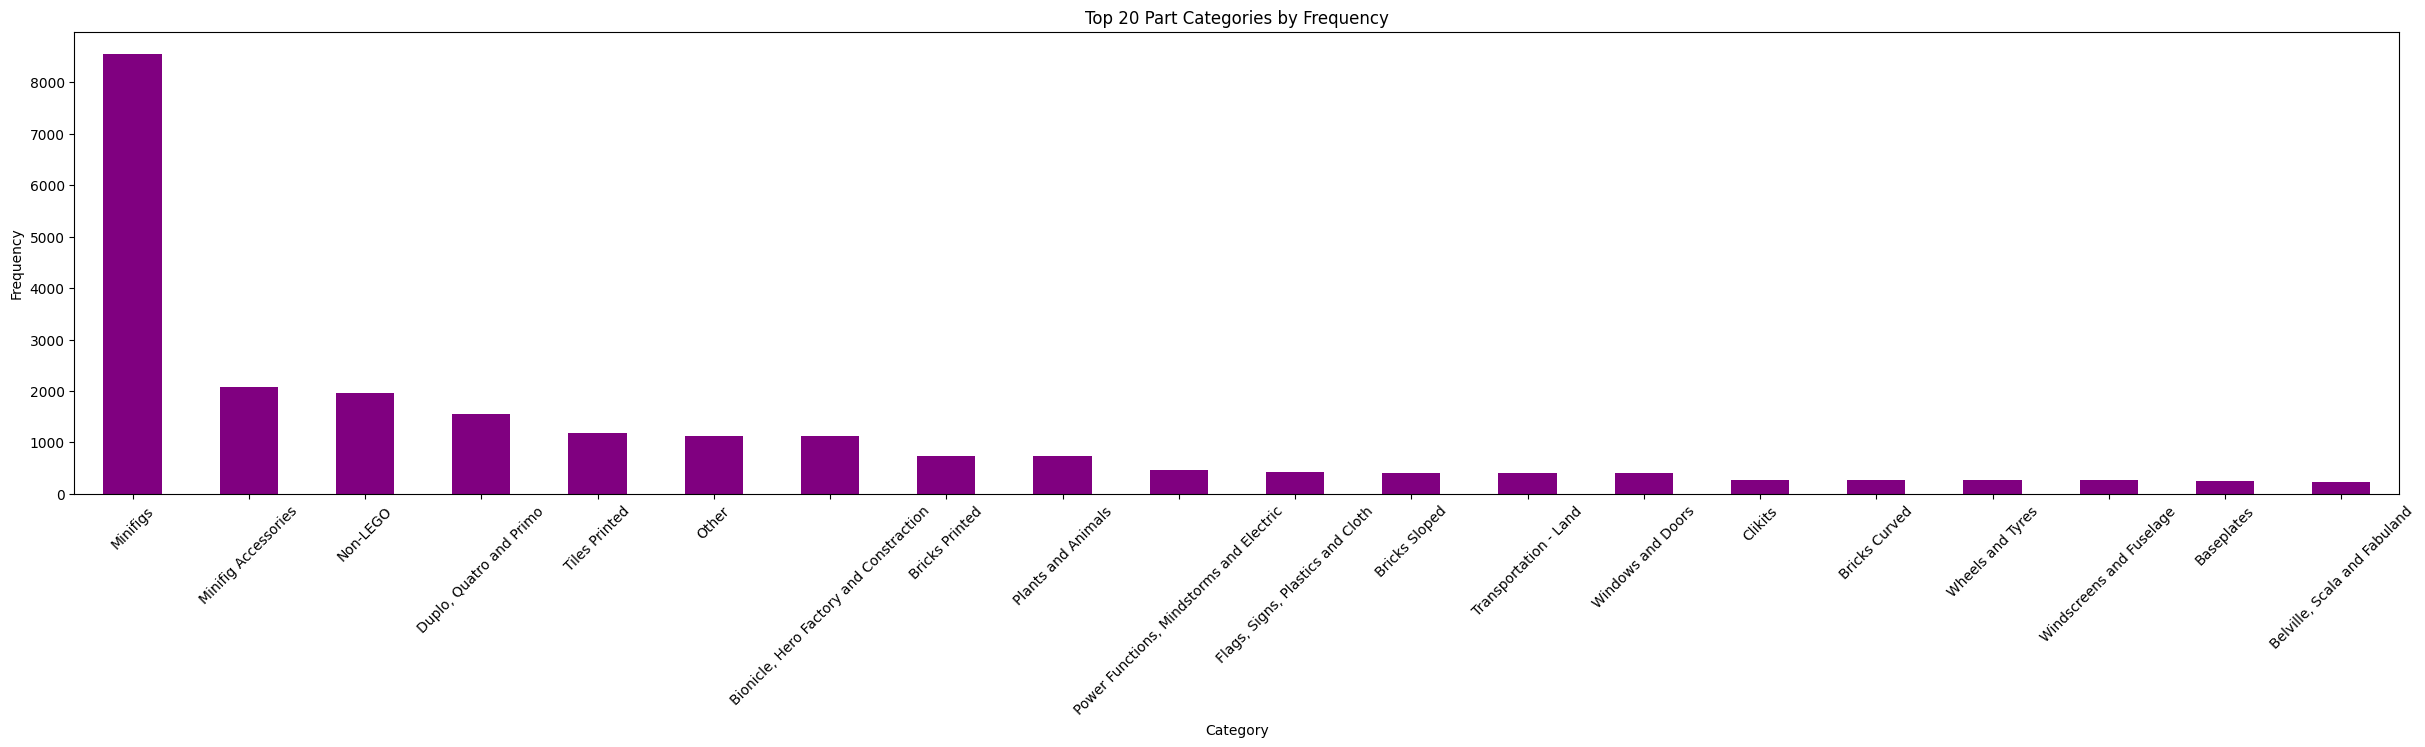

In [19]:
parts= dataframes["parts"]
part_categories= dataframes["part_categories"]
merged_df = parts.merge(part_categories, left_on="part_cat_id", right_on="id")

# Count the number of parts in each category
category_counts = merged_df["name_y"].value_counts()

# List the top 20 categories by frequency
top_20_categories = category_counts.head(20)

# Print the top 20 categories
print(top_20_categories)

plt.figure(figsize=(30, 6))
top_20_categories.plot(kind="bar",color='purple')
plt.title("Top 20 Part Categories by Frequency")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

**3. Find the dominant color of each set and plot the number of sets per dominant color:**

We can determine the dominant color by grouping sets by ID and finding the color that appears most frequently. Then, we plot the counts per dominant color.

        inventory_id   part_id  color_id  quantity is_spare    id  \
0                  1  48379c01        72       1.0        f    72   
1                 22     15573        72       1.0        f    72   
2                 22      2654        72       4.0        f    72   
3                 22     3070b        72       1.0        f    72   
4                 22     3070b        72       1.0        t    72   
...              ...       ...       ...       ...      ...   ...   
418450         10117      4133       351       6.0        f   351   
418451         10117      4728       351       3.0        f   351   
418452         10904      4728       351       4.0        f   351   
418453         12090      6180      1001       1.0        f  1001   
418454         13140      3001      1001       1.0        f  1001   

                    name     rgb is_trans    R    G    B  
0       Dark Bluish Gray  6C6E68        f  108  110  104  
1       Dark Bluish Gray  6C6E68        f  108  110  

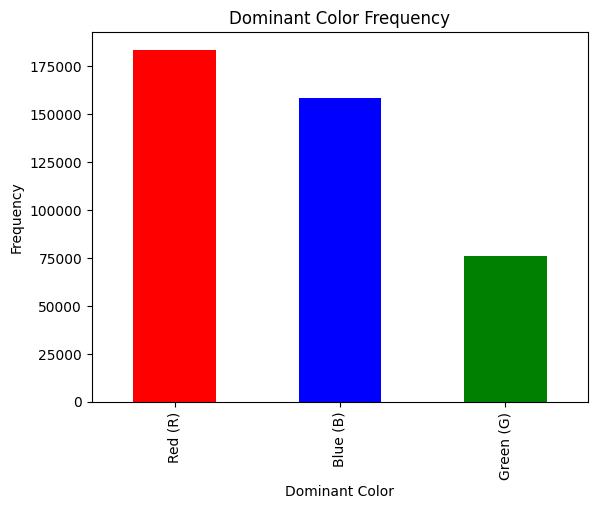

In [20]:


# Merge the necessary DataFrames
merged_df = dataframes['inventory_parts'].merge(dataframes['colors'], left_on="color_id", right_on="id")

# Convert the RGB values from HEX to separate R, G, and B values
merged_df['R'] = merged_df['rgb'].apply(lambda x: int(x[0:2], 16))
merged_df['G'] = merged_df['rgb'].apply(lambda x: int(x[2:4], 16))
merged_df['B'] = merged_df['rgb'].apply(lambda x: int(x[4:6], 16))
print(merged_df)
# Initialize arrays to store the frequency of each dominant color (R, G, B)
color_frequency_R = np.zeros(256, dtype=int)
color_frequency_G = np.zeros(256, dtype=int)
color_frequency_B = np.zeros(256, dtype=int)

# Initialize arrays to store the frequency of each dominant color (R, G, B)
dominant_colors = []

for index, row in merged_df.iterrows():
    r, g, b = row['R'], row['G'], row['B']
    color_counts = {'Red (R)': r, 'Green (G)': g, 'Blue (B)': b}
    dominant_color = max(color_counts, key=color_counts.get)
    dominant_colors.append(dominant_color)

# Count the frequency of each dominant color
dominant_color_counts = pd.Series(dominant_colors).value_counts()

# Create a bar chart
dominant_color_counts.plot(kind='bar', color=['red', 'blue','green'])
plt.xlabel('Dominant Color')
plt.ylabel('Frequency')
plt.title('Dominant Color Frequency')
plt.show()

**4. Create a scatter plot of the luminance of sets vs. their publishing year:**

First, we need to calculate the luminance of each set based on its color, and then we'll create the scatter plot.

<Axes: title={'center': 'Scatter Plot of Luminance vs. Year'}, xlabel='year', ylabel='luminance'>

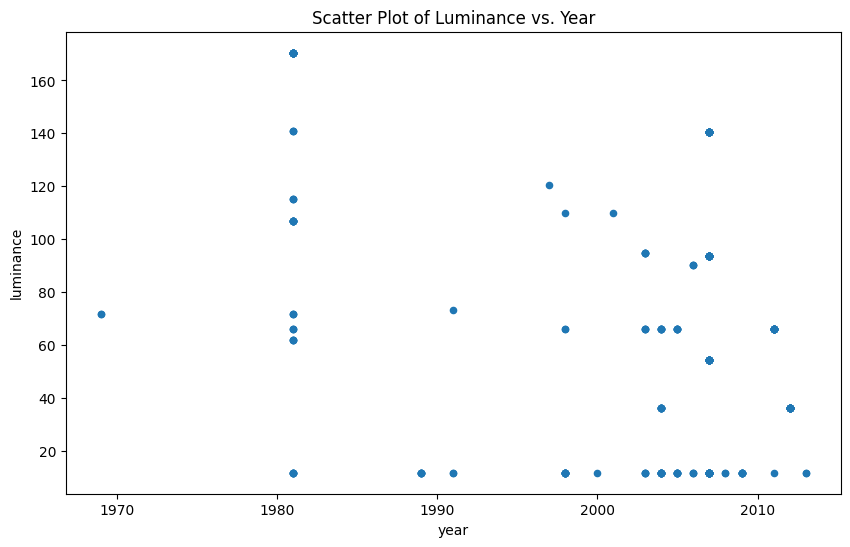

In [21]:
sets=dataframes['sets']
inventory_sets=dataframes['inventory_sets']
inventory_parts=dataframes['inventory_parts']
colors=dataframes['colors']
colors['R'] = colors['rgb'].apply(lambda x: int(x[0:2], 16))
colors['G'] = colors['rgb'].apply(lambda x: int(x[2:4], 16))
colors['B'] = colors['rgb'].apply(lambda x: int(x[4:6], 16))
colors['luminance'] = colors.apply(
    lambda row: ((0.299 * row["R"]) ** 2 + (0.587 * row["G"]) ** 2 + (0.114 * row["B"]) ** 2) ** 0.5, axis=1)
merged_df = sets.merge(inventory_sets, left_on='id', right_on='set_id')
merged_df = merged_df.merge(inventory_parts, left_on='inventory_id', right_on='inventory_id')
merged_df = merged_df.merge(colors, left_on='color_id', right_on='id')
x=merged_df['year']
y=merged_df['luminance']
merged_df.plot.scatter(x="year", y="luminance", figsize=(10, 6), title="Scatter Plot of Luminance vs. Year")


**Explain your approach and assumptions once this section is completed.**

luminance has decreasing order in the scatter plot

## 2. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this question you will again perform data wrangling and interpretation.

### 2.1. Loading phase
Load the json file into a `DataFrame`.


In [22]:
# Specify the path to the "data/lego" directory
data_directory = "data/bikes"
# List the CSV files in the directory
csv_files = [file for file in os.listdir(data_directory) if file.endswith('.json')]
print(csv_files)
# Create a dictionary to store DataFrames with meaningful names
dataframes = {}

# Load CSV files into DataFrames and use filenames as DataFrame names
for file in csv_files:
    # Create the full file path
    file_path = os.path.join(data_directory, file)
    # Extract the filename without the ".csv" extension
    df_name = os.path.splitext(file)[0]
    dataframes[df_name] = pd.read_json(file_path)
for df_name, df in dataframes.items():
    print(f"DataFrame Name: {df_name}")
    print(f"Dimensions (rows, columns): {df.shape}")
    print(df.columns)
    print("=" * 70)  # Add a separator for clarity

['metro-bike-share-trip-data.json']
DataFrame Name: metro-bike-share-trip-data
Dimensions (rows, columns): (132427, 14)
Index(['Bike ID', 'Duration', 'End Time', 'Ending Station ID',
       'Ending Station Latitude', 'Ending Station Longitude',
       'Passholder Type', 'Plan Duration', 'Start Time', 'Starting Station ID',
       'Starting Station Latitude', 'Starting Station Longitude', 'Trip ID',
       'Trip Route Category'],
      dtype='object')


### 2.2. Cleaning phase

Perform the following actions on the dataset.

1. Describe the type and the value range of each attribute.  

2. Indicate and transform the attributes that are `Categorical`.
3. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)?
4. What are the possible pitfalls of having such columns?

Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [23]:
#1.Describe each attribute
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Bike ID                     132417 non-null  float64
 1   Duration                    132427 non-null  int64  
 2   End Time                    132427 non-null  object 
 3   Ending Station ID           132331 non-null  float64
 4   Ending Station Latitude     131376 non-null  float64
 5   Ending Station Longitude    131376 non-null  float64
 6   Passholder Type             132427 non-null  object 
 7   Plan Duration               131661 non-null  float64
 8   Start Time                  132427 non-null  object 
 9   Starting Station ID         132408 non-null  float64
 10  Starting Station Latitude   132379 non-null  float64
 11  Starting Station Longitude  132379 non-null  float64
 12  Trip ID                     132427 non-null  int64  
 13  Trip Route Cat

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


In [24]:
#2.Indicate and transform categorical attributes

categorical_attributes = df.select_dtypes(include=['object'])
#our first guess is that any data type OBJECT is categorical attribute
print(categorical_attributes,categorical_attributes.columns)
#after observing data, only classes  Type and Trip Route Category are considered categorical
#[132427 rows x 4 columns] Index(['End Time', 'Passholder Type', 'Start Time', 'Trip Route Category'], dtype='object')
# Check if there are categorical columns
# List of columns to remove
columns_to_remove = ['Start Time', 'End Time']

# Remove the specified columns
categorical_attributes = categorical_attributes.drop(columns=columns_to_remove)

# Check the updated DataFrame
print(categorical_attributes.head())
if not categorical_attributes.empty:
    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=categorical_attributes.columns)
    
    # Print the transformed DataFrame
    print("Transformed DataFrame:")
    print(df_encoded.head())
    
    # You can save this transformed DataFrame to a new variable if needed
else:
    print("No categorical attributes found in the DataFrame.")
# Transform categorical attributes if necessary
# Example for one-hot encoding:
df_encoded = pd.get_dummies(df, columns=categorical_attributes.columns)

                   End Time Passholder Type           Start Time  \
0       2016-07-07T04:20:00    Monthly Pass  2016-07-07T04:17:00   
1       2016-07-07T06:33:00    Monthly Pass  2016-07-07T06:00:00   
2       2016-07-07T10:37:00       Flex Pass  2016-07-07T10:32:00   
3       2016-07-07T13:38:00       Flex Pass  2016-07-07T10:37:00   
4       2016-07-07T12:58:00         Walk-up  2016-07-07T12:51:00   
...                     ...             ...                  ...   
132422  2017-03-31T23:52:00         Walk-up  2017-03-31T23:43:00   
132423  2017-03-31T23:52:00         Walk-up  2017-03-31T23:44:00   
132424  2017-03-31T23:52:00         Walk-up  2017-03-31T23:44:00   
132425  2017-03-31T23:52:00         Walk-up  2017-03-31T23:45:00   
132426  2017-04-01T00:06:00         Walk-up  2017-03-31T23:45:00   

       Trip Route Category  
0               Round Trip  
1               Round Trip  
2               Round Trip  
3               Round Trip  
4               Round Trip  
...      

In [25]:
#3.Idnetify and deal with redundant columns
# Check for redundancy
# List to store pairs of redundant columns
redundant_columns = []

# Check for redundancy
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i < j:
            if df[col1].equals(df[col2]):
                redundant_columns.append((col1, col2))

# Print redundant column pairs
if len(redundant_columns) > 0:
    print("Redundant column pairs:")
    for pair in redundant_columns:
        print(f"{pair[0]} and {pair[1]} are redundant.")
else:
    print("No redundant columns found in the dataset.")

No redundant columns found in the dataset.


In [26]:
#4. Reduce data redundancy by extracting such columns to separate DataFrames:
redundant_columns.append('Ending Station Latitude')
redundant_columns.append('Ending Station Longitude')
redundant_columns.append('Starting Station Latitude')
redundant_columns.append('Starting Station Longitude')
non_redundant_df = df_encoded.drop(columns=redundant_columns)

print(non_redundant_df)
print('start and ending station latitude and longitude assumed trivial')

        Bike ID  Duration             End Time  Ending Station ID  \
0        6281.0       180  2016-07-07T04:20:00             3014.0   
1        6281.0      1980  2016-07-07T06:33:00             3014.0   
2        5861.0       300  2016-07-07T10:37:00             3016.0   
3        5861.0     10860  2016-07-07T13:38:00             3016.0   
4        6674.0       420  2016-07-07T12:58:00             3032.0   
...         ...       ...                  ...                ...   
132422   5978.0       540  2017-03-31T23:52:00             3035.0   
132423   6478.0       480  2017-03-31T23:52:00             3035.0   
132424   6183.0       480  2017-03-31T23:52:00             3054.0   
132425   5900.0       420  2017-03-31T23:52:00             3054.0   
132426   6207.0      1260  2017-04-01T00:06:00             3029.0   

        Plan Duration           Start Time  Starting Station ID   Trip ID  \
0                30.0  2016-07-07T04:17:00               3014.0   1912818   
1                

In [27]:
#5. Print the type of each column and its shape for each DataFrame:
print("Original DataFrame:")
print(df.dtypes)
print(df.shape)

print("Non-redundant DataFrame:")
print(non_redundant_df.dtypes)
print(non_redundant_df.shape)


Original DataFrame:
Bike ID                       float64
Duration                        int64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                object
Plan Duration                 float64
Start Time                     object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category            object
dtype: object
(132427, 14)
Non-redundant DataFrame:
Bike ID                           float64
Duration                            int64
End Time                           object
Ending Station ID                 float64
Plan Duration                     float64
Start Time                         object
Starting Station ID               float64
Trip ID                             int64
Passholder Type_Flex Pass            bool
Passholder Type_Mo

**Explain your approach and assumptions once this section is completed.**

we omitted redundant columns by definition and thinking about the dataset, also one hot coded object in nature data

### 2.3. Querying phase
Answer the following queries using the functionality of `Pandas`.

* Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).  

* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

2.3. Querying phase
2.3.1. Distribution of Outgoing Trips from Each Station
Starting Station ID
3069.0    5138
3030.0    5059
3005.0    4883
3064.0    4661
3031.0    4629
          ... 
3039.0     115
4108.0     108
3009.0      56
3000.0      29
3053.0      13
Name: count, Length: 67, dtype: int64


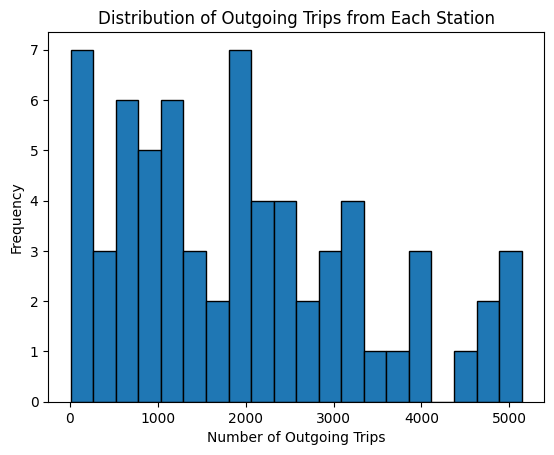


2.3.2. Distribution of Trip Durations (1-Minute Intervals)
count    132427.000000
mean       1555.301562
std        5814.241813
min          60.000000
25%         360.000000
50%         600.000000
75%        1080.000000
max       86400.000000
Name: Duration, dtype: float64


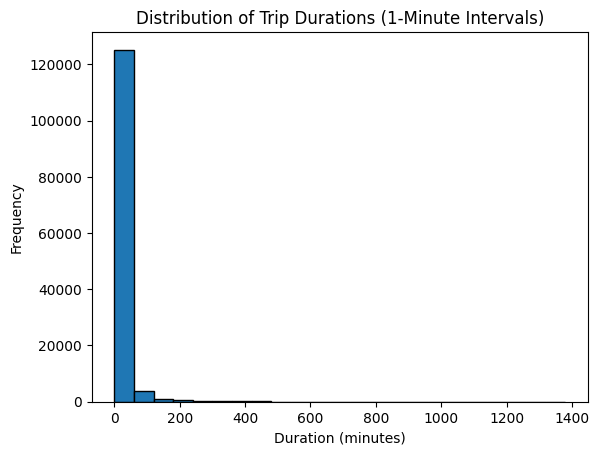


2.3.2. Distribution of Trip Starting Hours
count    132427.000000
mean         14.069895
std           4.949172
min           0.000000
25%          11.000000
50%          14.000000
75%          18.000000
max          23.000000
Name: Start Hour, dtype: float64


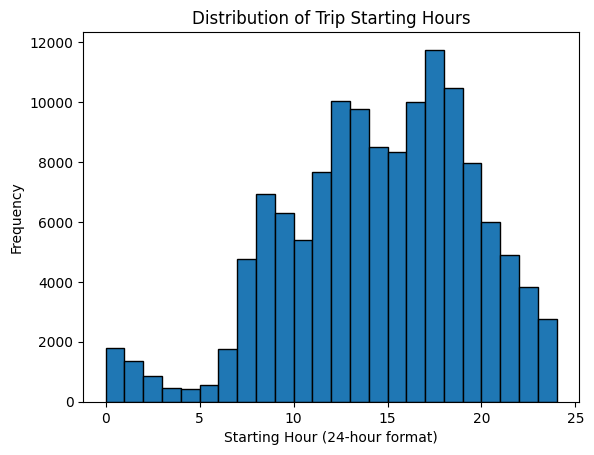


2.3.3. Proportion of Trips by Passholder Type and Trip Route Category
Passholder Type      Flex Pass  Monthly Pass  Staff Annual   Walk-up
Trip Route Category                                                 
One Way               0.075509      0.648033      0.002499  0.273959
Round Trip            0.037779      0.295033      0.006492  0.660696


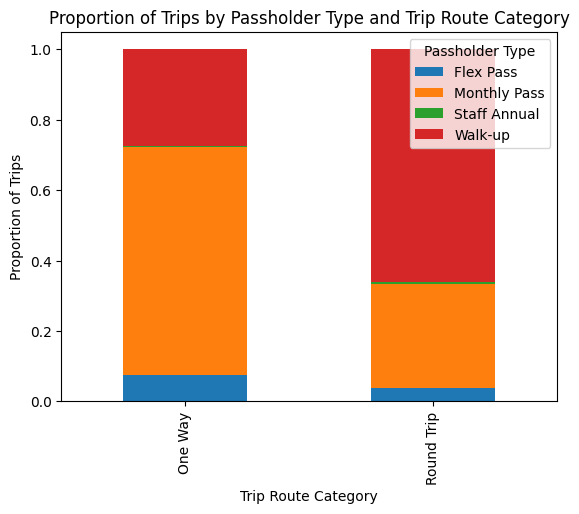


2.3.4. Morning Hours Proportion of Trips by Passholder Type and Trip Route Category
Passholder Type      Flex Pass  Monthly Pass  Staff Annual   Walk-up
Trip Route Category                                                 
One Way               0.076170      0.705426      0.002785  0.215619
Round Trip            0.037612      0.315224      0.011642  0.635522


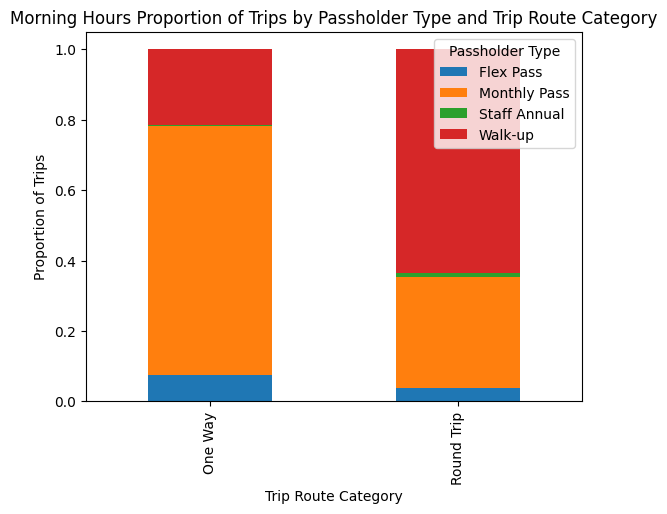


2.3.5. Proportion of Trips by Passholder Type and Trip Route Category for Two Equal-Count Time Intervals
                     Interval 1 - Flex Pass  Interval 1 - Monthly Pass  \
Trip Route Category                                                      
One Way                                4619                      39362   
Round Trip                              268                       2067   

                     Interval 1 - Staff Annual  Interval 1 - Walk-up  \
Trip Route Category                                                    
One Way                                    183                 15733   
Round Trip                                  59                  4186   

                     Interval 2 - Flex Pass  Interval 2 - Monthly Pass  \
Trip Route Category                                                      
One Way                                4415                      38170   
Round Trip                              215                       1705   

           

In [28]:
# 2.3. Querying phase
print("2.3. Querying phase")

# 2.3.1. Plot the distribution of the number of outgoing trips from each station in a histogram with 20 bins.
station_counts = df['Starting Station ID'].value_counts()
print("2.3.1. Distribution of Outgoing Trips from Each Station")
print(station_counts)
# Create a histogram
plt.hist(station_counts, bins=20, edgecolor='k')
plt.xlabel('Number of Outgoing Trips')
plt.ylabel('Frequency')
plt.title('Distribution of Outgoing Trips from Each Station')
plt.show()

# 2.3.2. Plot histograms for the duration and trip starting hour in the day attributes.
# Convert 'Start Time' to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])

# Extract the hour from the 'Start Time' and create a histogram for the trip starting hour
df['Start Hour'] = df['Start Time'].dt.hour

# Create a histogram for the duration in 1-minute intervals (converted from seconds)
print("\n2.3.2. Distribution of Trip Durations (1-Minute Intervals)")
print(df['Duration'].describe())
plt.hist(df['Duration'] // 60, bins=range(0, df['Duration'].max() // 60, 60), edgecolor='k')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations (1-Minute Intervals)')
plt.show()

# Create a histogram for the trip starting hour in 1-hour intervals
print("\n2.3.2. Distribution of Trip Starting Hours")
print(df['Start Hour'].describe())
plt.hist(df['Start Hour'], bins=range(0, 25), edgecolor='k')
plt.xlabel('Starting Hour (24-hour format)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Starting Hours')
plt.show()

# 2.3.3. For each trip route category, calculate the proportion of trips by passholder type and present your results in a stacked bar chart with normalized height.
print("\n2.3.3. Proportion of Trips by Passholder Type and Trip Route Category")
trip_route_passholder = df.groupby(['Trip Route Category', 'Passholder Type']).size().unstack(fill_value=0)
trip_route_passholder = trip_route_passholder.div(trip_route_passholder.sum(axis=1), axis=0)
print(trip_route_passholder)
# Plot a stacked bar chart
trip_route_passholder.plot(kind='bar', stacked=True)
plt.xlabel('Trip Route Category')
plt.ylabel('Proportion of Trips')
plt.title('Proportion of Trips by Passholder Type and Trip Route Category')
plt.legend(title='Passholder Type')
plt.show()

# 2.3.4. Considering only trips that begin in the morning hours (before noon), plot in a single bar chart the proportion of trips by passholder type and trip route category. Explain any outliers you observe.
print("\n2.3.4. Morning Hours Proportion of Trips by Passholder Type and Trip Route Category")
morning_trips = df[df['Start Hour'] < 12]
morning_trip_route_passholder = morning_trips.groupby(['Trip Route Category', 'Passholder Type']).size().unstack(fill_value=0)
morning_trip_route_passholder = morning_trip_route_passholder.div(morning_trip_route_passholder.sum(axis=1), axis=0)
print(morning_trip_route_passholder)
# Plot a stacked bar chart
morning_trip_route_passholder.plot(kind='bar', stacked=True)
plt.xlabel('Trip Route Category')
plt.ylabel('Proportion of Trips')
plt.title('Morning Hours Proportion of Trips by Passholder Type and Trip Route Category')
plt.legend(title='Passholder Type')
plt.show()

# 2.3.5. Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations.
# For each of the two intervals, calculate the proportion of trips by passholder type and trip route category.
print("\n2.3.5. Proportion of Trips by Passholder Type and Trip Route Category for Two Equal-Count Time Intervals")

# Calculate the frequency of each hour
hourly_counts = df['Start Hour'].value_counts()
sorted_hours = hourly_counts.sort_values(ascending=False).index
total_count = len(df)
half_count = total_count // 2
split_point = 0
current_count = 0
for hour in sorted_hours:
    current_count += hourly_counts[hour]
    if current_count >= half_count:
        split_point = hour
        break

# Separate the data into two intervals based on the split point
interval1 = df[df['Start Hour'] < split_point]
interval2 = df[df['Start Hour'] >= split_point]

# Group by 'Trip Route Category' and 'Passholder Type' and calculate proportions for each interval
interval1_trip_route_passholder = interval1.groupby(['Trip Route Category', 'Passholder Type']).size().unstack(fill_value=0)
interval2_trip_route_passholder = interval2.groupby(['Trip Route Category', 'Passholder Type']).size().unstack(fill_value=0)

# Calculate proportions
interval1_trip_route_passholder.columns = [f'Interval 1 - {col}' for col in interval1_trip_route_passholder.columns]
interval2_trip_route_passholder.columns = [f'Interval 2 - {col}' for col in interval2_trip_route_passholder.columns]

# Concatenate proportions for the two intervals
combined_proportions = pd.concat([interval1_trip_route_passholder, interval2_trip_route_passholder], axis=1)

print(combined_proportions)

# 2.3.6. Does the proportion of trips depend on whether it is the first or second hour interval?
# Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one?
# Assume that the number of trips per interval will not change if the scheme changes.
print("\n2.3.6. Analysis of Proportion of Trips in the First and Second Hour Intervals")

# Calculate the proportions for each interval
proportions_interval1 = interval1_trip_route_passholder.div(interval1_trip_route_passholder.sum().sum())
proportions_interval2 = interval2_trip_route_passholder.div(interval2_trip_route_passholder.sum().sum())

# Concatenate proportions for the two intervals
combined_proportions = pd.concat([proportions_interval1, proportions_interval2], keys=['Interval 1', 'Interval 2'])

print(combined_proportions)


## 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

**Run the following cell for a brief description about the dataset**

In [29]:
from IPython.core.display import HTML
HTML(filename='data'+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`.  
 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [30]:
# Define the path to the Titanic Excel file
file_path = 'data/titanic.xls'  # Replace with the actual file path

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Get basic information about the DataFrame
info = df.info()
summery=df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [31]:
 
columns_to_analyze = [
    'pclass',
    'survived',
    'name',
    'sex',
    'age',
    'sibsp',
    'parch',
    'ticket',
    'fare',
    'cabin',
    'embarked',
    'boat',
    'body',
    'home.dest'
]

# Initialize a dictionary to store the results
column_info = {
    'Column': [],
    'Unique Values': [],
    'Data Type': [],
    'Data Range': []
}

# Loop through the specified columns
for column in columns_to_analyze:
    unique_values = df[column].nunique()
    data_type = df[column].dtype
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        data_range = (df[column].min(), df[column].max())
    else:
        data_range = "Non-numeric"
    
    # Add the information to the dictionary
    column_info['Column'].append(column)
    column_info['Unique Values'].append(unique_values)
    column_info['Data Type'].append(data_type)
    column_info['Data Range'].append(data_range)

# Create a summary DataFrame from the dictionary
column_summary = pd.DataFrame(column_info)

# Print the summary
print(column_summary)


       Column  Unique Values Data Type       Data Range
0      pclass              3     int64           (1, 3)
1    survived              2     int64           (0, 1)
2        name           1307    object      Non-numeric
3         sex              2    object      Non-numeric
4         age             98   float64   (0.1667, 80.0)
5       sibsp              7     int64           (0, 8)
6       parch              8     int64           (0, 9)
7      ticket            939    object      Non-numeric
8        fare            281   float64  (0.0, 512.3292)
9       cabin            186    object      Non-numeric
10   embarked              3    object      Non-numeric
11       boat             28    object      Non-numeric
12       body            121   float64     (1.0, 328.0)
13  home.dest            369    object      Non-numeric


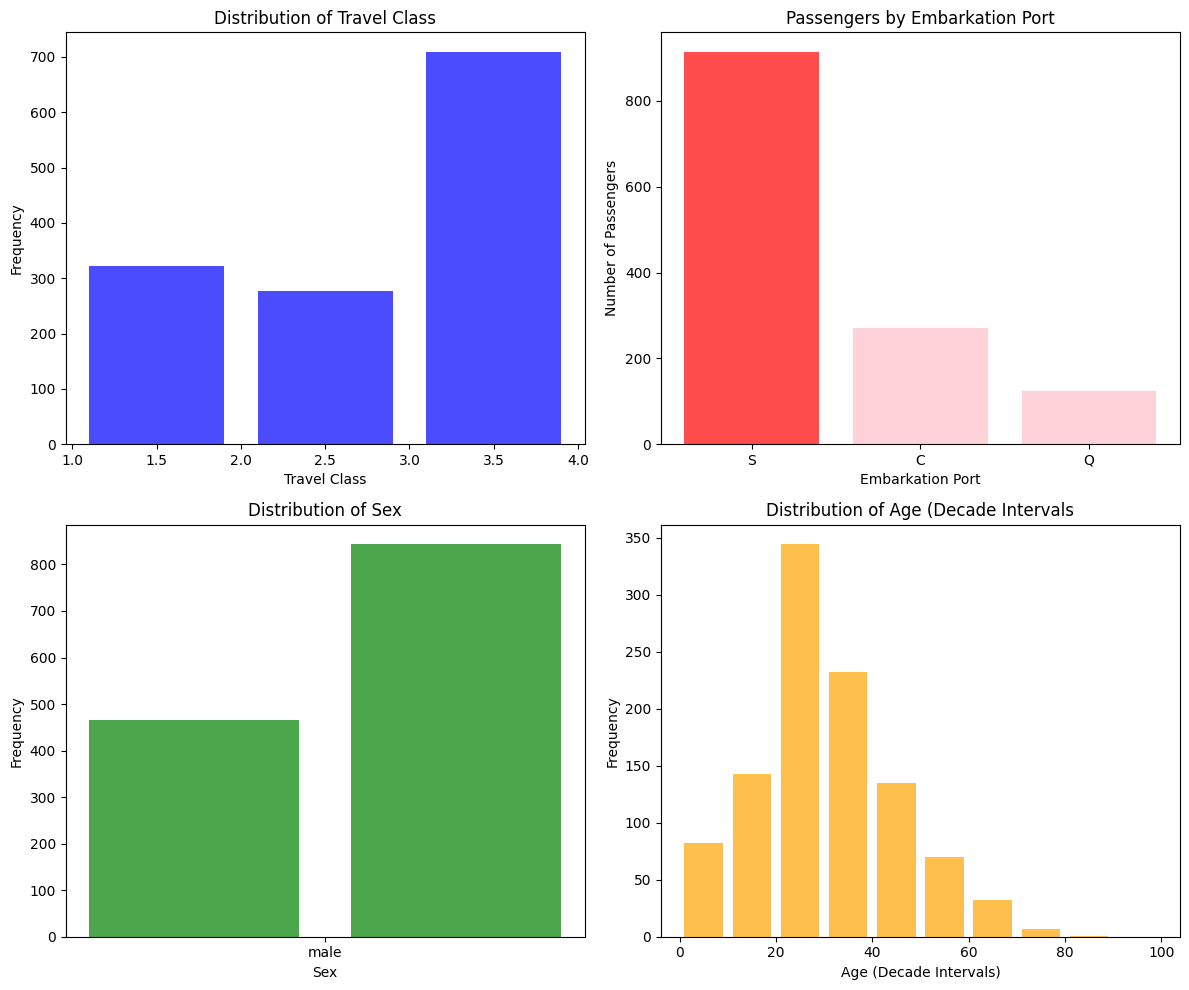

In [32]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histogram for Travel Class
axes[0, 0].hist(df['pclass'], bins=[1, 2, 3, 4], rwidth=0.8, alpha=0.7, color='blue')
axes[0, 0].set_xlabel('Travel Class')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Travel Class')

# Plot histogram for Sex
axes[1, 0].hist(df['sex'], bins=['female', 'male', 'other'], rwidth=0.8, alpha=0.7, color='green')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Sex')

# Plot histogram for Age with discrete decade intervals
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
axes[1, 1].hist(df['age'].dropna(), bins=age_bins, rwidth=0.8, alpha=0.7, color='orange')
axes[1, 1].set_xlabel('Age (Decade Intervals)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Age (Decade Intervals')

# Create a bar chart for the counts of passengers from each port
port_counts = df['embarked'].value_counts()
colors = ['red' if count > 800 else 'pink' for count in port_counts.values]
axes[0, 1].bar(port_counts.index, port_counts.values, alpha=0.7, color=colors)
axes[0, 1].set_xlabel('Embarkation Port')
axes[0, 1].set_ylabel('Number of Passengers')
axes[0, 1].set_title('Passengers by Embarkation Port')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


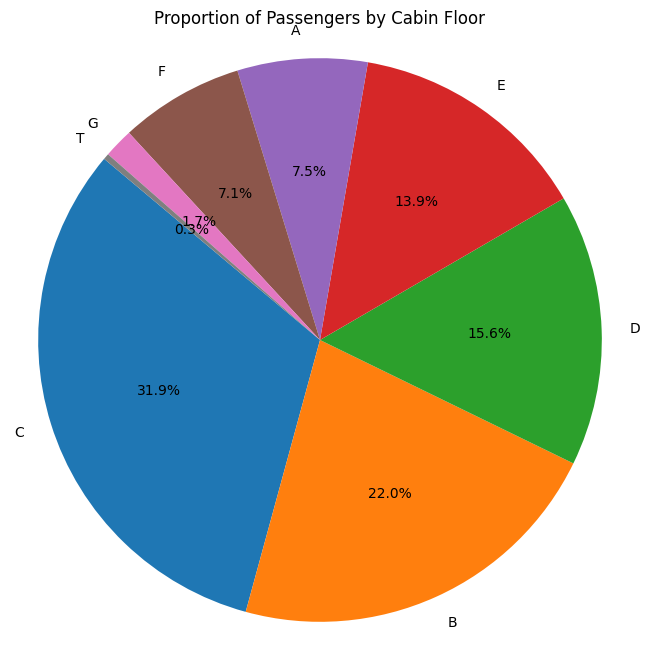

In [33]:
df['cabin_floor'] = df['cabin'].str.extract(r'([A-Za-z])')

# Count the number of passengers on each cabin floor
cabin_floor_counts = df['cabin_floor'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cabin_floor_counts, labels=cabin_floor_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set a title
plt.title('Proportion of Passengers by Cabin Floor')

# Show the pie chart
plt.show()

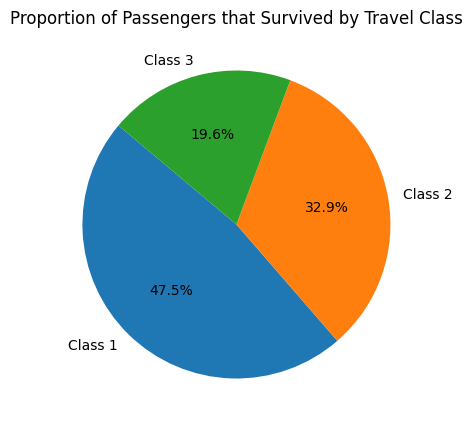

In [34]:
grouped_by_class = df.groupby('pclass')

# Initialize a list to store the pie chart data and labels
pie_data = []
labels = []

# Iterate through each group (travel class)
for name, group in grouped_by_class:
    # Calculate the proportion of survivors
    total_passengers = len(group)
    survivors = len(group[group['survived'] == 1])
    proportion_survived = survivors / total_passengers

    # Add the proportion and label to the lists
    pie_data.append(proportion_survived)
    labels.append(f"Class {name}")

# Create pie charts for each travel class
plt.figure(figsize=(12, 5))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=140)

# Set a title
plt.title('Proportion of Passengers that Survived by Travel Class')

# Show the pie chart
plt.show()

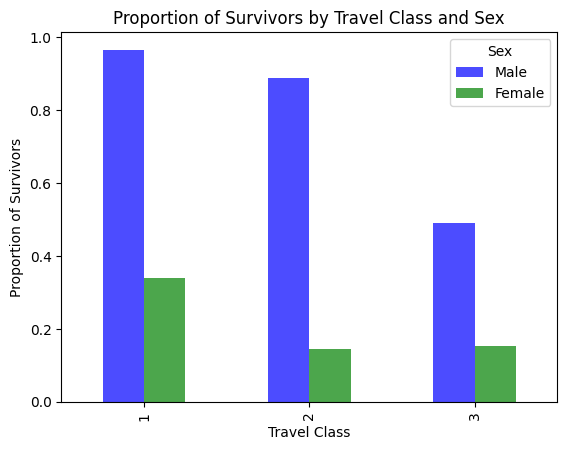

In [35]:
# Group the data by travel class and sex, and calculate the proportion of survivors
grouped = df.groupby(['pclass', 'sex'])['survived'].mean()

# Unstack the grouped data to create a DataFrame suitable for plotting
proportions = grouped.unstack()

# Plot the grouped bar chart
proportions.plot(kind='bar', stacked=False, color=['blue', 'green'], alpha=0.7)

# Set labels and title
plt.xlabel('Travel Class')
plt.ylabel('Proportion of Survivors')
plt.title('Proportion of Survivors by Travel Class and Sex')

# Show the legend
plt.legend(title='Sex', labels=['Male', 'Female'])

# Show the plot
plt.show()

   pclass     sex  Age Category 1  Age Category 2
0       1  female        0.951220        0.967391
1       1    male        0.531250        0.302521
2       2  female        0.910714        0.872340
3       2    male        0.216216        0.083333
4       3  female        0.513761        0.372093
5       3    male        0.183036        0.144000


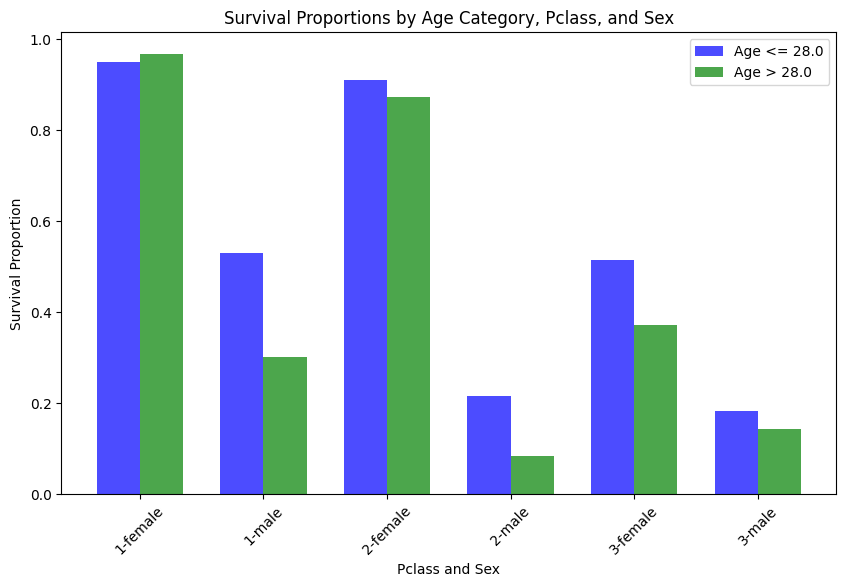

In [36]:
#Step 1: Split the data into two equally populated age categories
age_median = df['age'].median()
category1 = df[df['age'] <= age_median]
category2 = df[df['age'] > age_median]

# Step 2: Calculate survival proportions for each combination
proportions1 = category1.groupby(['pclass', 'sex'])['survived'].mean()
proportions2 = category2.groupby(['pclass', 'sex'])['survived'].mean()

# Step 3: Present the results in a DataFrame with a unique index
result_df = pd.DataFrame({'Age Category 1': proportions1, 'Age Category 2': proportions2})

# Fill missing values with 0 (if a category doesn't exist)
result_df = result_df.fillna(0)

# Reset the index to create a unique index
result_df.reset_index(inplace=True)

# Display the result DataFrame
print(result_df)

# Create a bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.35

index = range(len(result_df))
labels = [f'{pclass}-{sex}' for pclass, sex in zip(result_df['pclass'], result_df['sex'])]

bar1 = plt.bar(index, result_df['Age Category 1'], bar_width, label=f'Age <= {age_median}', color='b', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in index], result_df['Age Category 2'], bar_width, label=f'Age > {age_median}', color='g', alpha=0.7)

plt.xlabel('Pclass and Sex')
plt.ylabel('Survival Proportion')
plt.title('Survival Proportions by Age Category, Pclass, and Sex')
plt.xticks([i + bar_width / 2 for i in index], labels, rotation=45)
plt.legend()

plt.show()

## Bonus. Covid in the US
In this question, you are required to reproduce the graphs shown in a real journalistic article. After all, reproducibility is an important part of professional journalism as well as data science. Also, a great deal of a data scientist's work is to communicate data in a way that anyone with any level of expertise in the field would understand.

You should reproduce the 4 graphs shown in <a href="https://projects.fivethirtyeight.com/coronavirus-polls/"> this article</a>. The data is openly accessible through <a href="https://github.com/fivethirtyeight/covid-19-polls/"> FiveThirtyEight's github</a>. Nevertheless, both the data and the article are available in `data` folder in case of unstable internet connections!

*Note: Your graphs don't have to be as interactive or detailed as the ones on the website. Only showing the averages, some (not all) data points with light color, legends, titles, x values, and y values are necessary.*

In [70]:

data_directory = "data/covid/covid-19-polls-master"

# List the CSV files in the directory
csv_files = [file for file in os.listdir(data_directory) if file.endswith('.csv')]

# Create a dictionary to store DataFrames with meaningful names
dataframes = {}

# Load CSV files into DataFrames and use filenames as DataFrame names
for file in csv_files:
    # Create the full file path
    file_path = os.path.join(data_directory, file)
    # Extract the filename without the ".csv" extension
    df_name = os.path.splitext(file)[0]
    dataframes[df_name] = pd.read_csv(file_path)


for df_name, df in dataframes.items():
    
    print(f"DataFrame Name: {df_name}")
    print(f"Dimensions (rows, columns): {df.shape}")
    display(df)
    #df.info()
    print("=" * 60)  # Add a separator for clarity
    

DataFrame Name: covid_concern_toplines
Dimensions (rows, columns): (1496, 8)


,subject,modeldate,party,very_estimate,somewhat_estimate,not_very_estimate,not_at_all_estimate,timestamp
0,concern-economy,3/2/2022,all,48.953147,35.466522,10.451832,3.739761,15:12:25 2 Mar 2022
1,concern-infected,3/2/2022,all,24.186896,32.532791,26.515491,16.539938,15:12:28 2 Mar 2022
2,concern-economy,3/1/2022,all,48.953147,35.466522,10.451832,3.739761,04:08:53 2 Mar 2022
3,concern-infected,3/1/2022,all,24.186896,32.532791,26.515491,16.539938,04:09:00 2 Mar 2022
4,concern-economy,2/28/2022,all,49.041857,35.450926,10.346955,3.744365,10:58:25 28 Feb 2022
...,...,...,...,...,...,...,...,...
1491,concern-infected,2/17/2020,all,16.427300,24.806250,37.797340,19.744810,17:46:32 2 Apr 2020
1492,concern-economy,2/16/2020,all,22.756400,32.289010,24.015140,8.969726,17:46:12 2 Apr 2020
1493,concern-infected,2/16/2020,all,16.427300,24.806250,37.797340,19.744810,17:46:32 2 Apr 2020
1494,concern-economy,2/15/2020,all,22.756400,32.289010,24.015140,8.969726,17:46:12 2 Apr 2020


DataFrame Name: covid_approval_toplines
Dimensions (rows, columns): (5377, 6)


,subject,modeldate,party,approve_estimate,disapprove_estimate,timestamp
0,Biden,9/22/2022,D,82.481350,13.458074,09:11:07 22 Sep 2022
1,Biden,9/22/2022,I,44.242568,45.651047,09:11:09 22 Sep 2022
2,Biden,9/22/2022,R,18.394322,75.880826,09:11:10 22 Sep 2022
3,Biden,9/22/2022,all,49.134795,42.581274,09:11:13 22 Sep 2022
4,Biden,9/21/2022,R,18.393755,75.736923,09:10:17 22 Sep 2022
...,...,...,...,...,...,...
5372,Trump,2/16/2020,I,41.357480,23.846170,17:45:25 2 Apr 2020
5373,Trump,2/15/2020,R,80.400760,5.410971,17:45:39 2 Apr 2020
5374,Trump,2/15/2020,I,41.357480,23.846170,17:45:25 2 Apr 2020
5375,Trump,2/15/2020,all,46.820010,26.486840,17:45:54 2 Apr 2020


DataFrame Name: covid_concern_polls_adjusted
Dimensions (rows, columns): (601, 23)


,subject,modeldate,party,startdate,enddate,pollster,grade,samplesize,population,weight,...,very,somewhat,not_very,not_at_all,very_adjusted,somewhat_adjusted,not_very_adjusted,not_at_all_adjusted,timestamp,url
0,concern-economy,9/22/2022,all,1/27/2020,1/29/2020,Morning Consult,B,2202.0,a,0.830621,...,19.00,33.00,23.00,11.00,15.675954,36.575784,26.595179,11.630194,08:55:27 22 Apr 2021,https://morningconsult.com/wp-content/uploads/...
1,concern-economy,9/22/2022,all,1/31/2020,2/2/2020,Morning Consult,B,2202.0,a,0.756429,...,26.00,32.00,25.00,7.00,22.675954,35.575784,28.595179,7.630194,08:55:27 22 Apr 2021,https://morningconsult.com/wp-content/uploads/...
2,concern-economy,9/22/2022,all,2/7/2020,2/9/2020,Morning Consult,B,2200.0,a,0.698271,...,23.00,32.00,24.00,9.00,19.675954,35.575784,27.595179,9.630194,08:55:27 22 Apr 2021,https://morningconsult.com/wp-content/uploads/...
3,concern-economy,9/22/2022,all,2/13/2020,2/18/2020,Kaiser Family Foundation,NaN,1207.0,a,1.866967,...,22.00,35.00,28.00,15.00,26.940420,33.170763,25.812578,13.449881,08:55:27 22 Apr 2021,http://files.kff.org/attachment/Topline-KFF-He...
4,concern-economy,9/22/2022,all,2/24/2020,2/26/2020,Morning Consult,B,2200.0,a,0.484463,...,32.00,37.00,18.00,6.00,28.675954,40.575784,21.595179,6.630194,08:55:27 22 Apr 2021,https://morningconsult.com/wp-content/uploads/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,concern-infected,9/22/2022,all,4/3/2021,4/6/2021,YouGov,B+,1500.0,a,0.901471,...,18.00,32.00,31.00,19.00,22.673872,30.032376,29.092027,18.485143,08:55:30 22 Apr 2021,https://docs.cdn.yougov.com/4243y0nkbo/econTab...
597,concern-infected,9/22/2022,all,4/6/2021,4/6/2021,Data for Progress,B,1244.0,a,1.467803,...,22.34,34.16,22.65,17.25,21.759016,33.679530,23.670727,17.731963,08:55:30 22 Apr 2021,https://docs.google.com/spreadsheets/d/1DzzQ2Q...
598,concern-infected,9/22/2022,all,4/9/2021,4/11/2021,LÃ©ger,B/C,1002.0,a,0.861170,...,20.00,30.00,22.00,20.00,24.625142,30.263396,23.336962,17.410730,08:55:30 22 Apr 2021,https://2g2ckk18vixp3neolz4b6605-wpengine.netd...
599,concern-infected,9/22/2022,all,4/10/2021,4/13/2021,YouGov,B+,1500.0,a,1.014240,...,16.00,34.00,29.00,20.00,20.673872,32.032376,27.092027,19.485143,08:55:30 22 Apr 2021,https://docs.cdn.yougov.com/wvjmyy0dlk/econTab...


DataFrame Name: covid_approval_polls_adjusted
Dimensions (rows, columns): (3739, 19)


,subject,modeldate,party,startdate,enddate,pollster,grade,samplesize,population,weight,influence,multiversions,tracking,approve,disapprove,approve_adjusted,disapprove_adjusted,timestamp,url
0,Biden,9/22/2022,D,1/24/2021,1/26/2021,YouGov,B+,477.00,a,0.628524,0.000000,NaN,NaN,84.0,3.0,86.535946,2.429147,08:55:08 22 Apr 2021,https://docs.cdn.yougov.com/ld46rgtdlz/econTab...
1,Biden,9/22/2022,D,1/29/2021,2/1/2021,Morning Consult,B,808.00,rv,0.833747,0.000000,NaN,NaN,89.0,7.0,90.312766,6.414667,08:55:08 22 Apr 2021,https://assets.morningconsult.com/wp-uploads/2...
2,Biden,9/22/2022,D,2/5/2021,2/7/2021,YouGov,B+,336.00,a,0.352187,0.000000,NaN,NaN,88.0,8.0,90.535946,7.429147,08:55:08 22 Apr 2021,https://big.assets.huffingtonpost.com/athena/f...
3,Biden,9/22/2022,D,2/11/2021,2/14/2021,Quinnipiac University,A-,306.24,a,0.583744,0.000000,NaN,NaN,95.0,2.0,94.010066,2.728622,08:55:08 22 Apr 2021,https://poll.qu.edu/national/release-detail?Re...
4,Biden,9/22/2022,D,2/12/2021,2/15/2021,YouGov,B+,332.00,a,0.331265,0.000000,NaN,NaN,86.0,4.0,88.535946,3.429147,08:55:08 22 Apr 2021,https://big.assets.huffingtonpost.com/athena/f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,Biden,9/22/2022,all,9/8/2022,9/11/2022,Global Strategy Group/GBAO/Navigator Research,B/C,1001.00,rv,0.786014,0.568192,NaN,NaN,53.0,44.0,51.716717,42.887991,09:11:13 22 Sep 2022,https://navigatorresearch.org/wp-content/uploa...
3735,Biden,9/22/2022,all,9/9/2022,9/11/2022,Morning Consult,B,2006.00,rv,1.477550,1.067526,NaN,NaN,49.0,45.0,49.258960,43.948578,09:11:13 22 Sep 2022,https://assets.morningconsult.com/wp-uploads/2...
3736,Biden,9/22/2022,all,9/9/2022,9/12/2022,AP-NORC,NaN,1054.00,a,1.450404,1.113832,NaN,NaN,55.0,43.0,51.552186,42.845355,09:11:13 22 Sep 2022,https://apnorc.org/projects/despite-some-signa...
3737,Biden,9/22/2022,all,9/14/2022,9/15/2022,Redfield & Wilton Strategies,B/C,1500.00,rv,0.990821,0.886550,NaN,NaN,43.0,37.0,45.651449,43.421431,09:11:13 22 Sep 2022,https://view.officeapps.live.com/op/view.aspx?...


DataFrame Name: covid_concern_polls
Dimensions (rows, columns): (678, 15)


,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,very,somewhat,not_very,not_at_all,url
0,2020-01-27,2020-01-29,Morning Consult,NaN,2202,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,19.00,33.00,23.00,11.00,https://morningconsult.com/wp-content/uploads/...
1,2020-01-31,2020-02-02,Morning Consult,NaN,2202,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,26.00,32.00,25.00,7.00,https://morningconsult.com/wp-content/uploads/...
2,2020-02-02,2020-02-04,YouGov,Economist,1500,a,all,concern-infected,False,Taking into consideration both your risk of co...,13.00,26.00,43.00,18.00,https://d25d2506sfb94s.cloudfront.net/cumulus_...
3,2020-02-07,2020-02-09,Morning Consult,NaN,2200,a,all,concern-economy,False,How concerned are you that the coronavirus wil...,23.00,32.00,24.00,9.00,https://morningconsult.com/wp-content/uploads/...
4,2020-02-07,2020-02-09,YouGov,Huffington Post,1000,a,all,concern-infected,False,How concerned are you that you or someone in y...,11.00,24.00,33.00,20.00,https://projects.fivethirtyeight.com/polls/202...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,2021-04-06,2021-04-06,Data for Progress,NaN,1244,a,all,concern-infected,False,How worried are you personally about experienc...,22.34,34.16,22.65,17.25,https://docs.google.com/spreadsheets/d/1DzzQ2Q...
674,2021-04-09,2021-04-11,Léger,Association for Canadian Studies,1002,a,all,concern-infected,False,Are you personally afraid of contracting the C...,20.00,30.00,22.00,20.00,https://2g2ckk18vixp3neolz4b6605-wpengine.netd...
675,2021-04-10,2021-04-13,YouGov,Economist,1500,a,all,concern-infected,False,Taking into consideration both your risk of co...,16.00,34.00,29.00,20.00,https://docs.cdn.yougov.com/wvjmyy0dlk/econTab...
676,2021-04-17,2021-04-20,YouGov,Economist,1500,a,all,concern-infected,False,Taking into consideration both your risk of co...,20.00,31.00,31.00,17.00,https://docs.cdn.yougov.com/e89wuts0a9/econTab...


DataFrame Name: covid_approval_polls
Dimensions (rows, columns): (3789, 13)


,start_date,end_date,pollster,sponsor,sample_size,population,party,subject,tracking,text,approve,disapprove,url
0,2020-02-02,2020-02-04,YouGov,Economist,1500.0,a,all,Trump,FALSE,Do you approve or disapprove of Donald Trump’s...,42.0,29.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
1,2020-02-02,2020-02-04,YouGov,Economist,376.0,a,R,Trump,FALSE,Do you approve or disapprove of Donald Trump’s...,75.0,6.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
2,2020-02-02,2020-02-04,YouGov,Economist,523.0,a,D,Trump,FALSE,Do you approve or disapprove of Donald Trump’s...,21.0,51.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
3,2020-02-02,2020-02-04,YouGov,Economist,599.0,a,I,Trump,FALSE,Do you approve or disapprove of Donald Trump’s...,39.0,25.0,https://d25d2506sfb94s.cloudfront.net/cumulus_...
4,2020-02-07,2020-02-09,Morning Consult,NaN,2200.0,a,all,Trump,FALSE,Do you approve or disapprove of the job each o...,57.0,22.0,https://morningconsult.com/wp-content/uploads/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,2022-09-14,2022-09-15,Redfield & Wilton Strategies,NaN,311.0,rv,I,Biden,FALSE,"To what extent, if at all, do you approve or d...",30.0,35.0,https://view.officeapps.live.com/op/view.aspx?...
3785,2022-09-16,2022-09-19,Echelon Insights,NaN,1056.0,lv,all,Biden,FALSE,Do you approve or disapprove of how Joe Biden ...,51.0,43.0,http://echeloninsights.com/wp-content/uploads/...
3786,2022-09-16,2022-09-19,Echelon Insights,NaN,389.0,lv,R,Biden,FALSE,Do you approve or disapprove of how Joe Biden ...,17.0,76.0,http://echeloninsights.com/wp-content/uploads/...
3787,2022-09-16,2022-09-19,Echelon Insights,NaN,436.0,lv,D,Biden,FALSE,Do you approve or disapprove of how Joe Biden ...,85.0,10.0,http://echeloninsights.com/wp-content/uploads/...


In [71]:
print('Do Americans approve of Biden’s response to the coronavirus crisis? A calculation of the share of all Americans who approve of the president’s handling of the coronavirus outbreak')

Do Americans approve of Biden’s response to the coronavirus crisis? A calculation of the share of all Americans who approve of the president’s handling of the coronavirus outbreak


In [72]:
# Define the columns to drop for each DataFrame
columns_to_drop = {
    'covid_concern_toplines':['subject','modeldate'],
    'covid_approval_toplines':['modeldate'],
    'covid_concern_polls_adjusted': ['tracking', 'population', 'multiversions','subject','pollster', 'grade', 'url','startdate','modeldate'],
    'covid_concern_polls': ['start_date','tracking', 'subject', 'sponsor', 'pollster', 'population', 'url','text'],
    'covid_approval_polls': ['start_date','pollster', 'sponsor', 'population', 'tracking', 'text', 'url'],
    'covid_approval_polls_adjusted': ['pollster', 'grade', 'population', 'multiversions', 'tracking', 'url', 'startdate', 'enddate', 'modeldate']
}

# Drop specified columns for each DataFrame if they exist
for df_name, cols_to_drop in columns_to_drop.items():
    if df_name in dataframes:
        dataframes[df_name] = dataframes[df_name].drop(columns=[col for col in cols_to_drop if col in dataframes[df_name]])

for df_name, df in dataframes.items():
    print(f"DataFrame Name: {df_name}")
    print(f"Dimensions (rows, columns): {df.shape}")
    display(df)
    #df.info()
    print("=" * 145 )  # Add a separator for clarity
    


DataFrame Name: covid_concern_toplines
Dimensions (rows, columns): (1496, 6)


,party,very_estimate,somewhat_estimate,not_very_estimate,not_at_all_estimate,timestamp
0,all,48.953147,35.466522,10.451832,3.739761,15:12:25 2 Mar 2022
1,all,24.186896,32.532791,26.515491,16.539938,15:12:28 2 Mar 2022
2,all,48.953147,35.466522,10.451832,3.739761,04:08:53 2 Mar 2022
3,all,24.186896,32.532791,26.515491,16.539938,04:09:00 2 Mar 2022
4,all,49.041857,35.450926,10.346955,3.744365,10:58:25 28 Feb 2022
...,...,...,...,...,...,...
1491,all,16.427300,24.806250,37.797340,19.744810,17:46:32 2 Apr 2020
1492,all,22.756400,32.289010,24.015140,8.969726,17:46:12 2 Apr 2020
1493,all,16.427300,24.806250,37.797340,19.744810,17:46:32 2 Apr 2020
1494,all,22.756400,32.289010,24.015140,8.969726,17:46:12 2 Apr 2020


DataFrame Name: covid_approval_toplines
Dimensions (rows, columns): (5377, 5)


,subject,party,approve_estimate,disapprove_estimate,timestamp
0,Biden,D,82.481350,13.458074,09:11:07 22 Sep 2022
1,Biden,I,44.242568,45.651047,09:11:09 22 Sep 2022
2,Biden,R,18.394322,75.880826,09:11:10 22 Sep 2022
3,Biden,all,49.134795,42.581274,09:11:13 22 Sep 2022
4,Biden,R,18.393755,75.736923,09:10:17 22 Sep 2022
...,...,...,...,...,...
5372,Trump,I,41.357480,23.846170,17:45:25 2 Apr 2020
5373,Trump,R,80.400760,5.410971,17:45:39 2 Apr 2020
5374,Trump,I,41.357480,23.846170,17:45:25 2 Apr 2020
5375,Trump,all,46.820010,26.486840,17:45:54 2 Apr 2020


DataFrame Name: covid_concern_polls_adjusted
Dimensions (rows, columns): (601, 14)


,party,enddate,samplesize,weight,influence,very,somewhat,not_very,not_at_all,very_adjusted,somewhat_adjusted,not_very_adjusted,not_at_all_adjusted,timestamp
0,all,1/29/2020,2202.0,0.830621,0.000000,19.00,33.00,23.00,11.00,15.675954,36.575784,26.595179,11.630194,08:55:27 22 Apr 2021
1,all,2/2/2020,2202.0,0.756429,0.000000,26.00,32.00,25.00,7.00,22.675954,35.575784,28.595179,7.630194,08:55:27 22 Apr 2021
2,all,2/9/2020,2200.0,0.698271,0.000000,23.00,32.00,24.00,9.00,19.675954,35.575784,27.595179,9.630194,08:55:27 22 Apr 2021
3,all,2/18/2020,1207.0,1.866967,0.000000,22.00,35.00,28.00,15.00,26.940420,33.170763,25.812578,13.449881,08:55:27 22 Apr 2021
4,all,2/26/2020,2200.0,0.484463,0.000000,32.00,37.00,18.00,6.00,28.675954,40.575784,21.595179,6.630194,08:55:27 22 Apr 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,all,4/6/2021,1500.0,0.901471,0.547246,18.00,32.00,31.00,19.00,22.673872,30.032376,29.092027,18.485143,08:55:30 22 Apr 2021
597,all,4/6/2021,1244.0,1.467803,0.941056,22.34,34.16,22.65,17.25,21.759016,33.679530,23.670727,17.731963,08:55:30 22 Apr 2021
598,all,4/11/2021,1002.0,0.861170,0.644193,20.00,30.00,22.00,20.00,24.625142,30.263396,23.336962,17.410730,08:55:30 22 Apr 2021
599,all,4/13/2021,1500.0,1.014240,0.814941,16.00,34.00,29.00,20.00,20.673872,32.032376,27.092027,19.485143,08:55:30 22 Apr 2021


DataFrame Name: covid_approval_polls_adjusted
Dimensions (rows, columns): (3739, 10)


,subject,party,samplesize,weight,influence,approve,disapprove,approve_adjusted,disapprove_adjusted,timestamp
0,Biden,D,477.00,0.628524,0.000000,84.0,3.0,86.535946,2.429147,08:55:08 22 Apr 2021
1,Biden,D,808.00,0.833747,0.000000,89.0,7.0,90.312766,6.414667,08:55:08 22 Apr 2021
2,Biden,D,336.00,0.352187,0.000000,88.0,8.0,90.535946,7.429147,08:55:08 22 Apr 2021
3,Biden,D,306.24,0.583744,0.000000,95.0,2.0,94.010066,2.728622,08:55:08 22 Apr 2021
4,Biden,D,332.00,0.331265,0.000000,86.0,4.0,88.535946,3.429147,08:55:08 22 Apr 2021
...,...,...,...,...,...,...,...,...,...,...
3734,Biden,all,1001.00,0.786014,0.568192,53.0,44.0,51.716717,42.887991,09:11:13 22 Sep 2022
3735,Biden,all,2006.00,1.477550,1.067526,49.0,45.0,49.258960,43.948578,09:11:13 22 Sep 2022
3736,Biden,all,1054.00,1.450404,1.113832,55.0,43.0,51.552186,42.845355,09:11:13 22 Sep 2022
3737,Biden,all,1500.00,0.990821,0.886550,43.0,37.0,45.651449,43.421431,09:11:13 22 Sep 2022


DataFrame Name: covid_concern_polls
Dimensions (rows, columns): (678, 7)


,end_date,sample_size,party,very,somewhat,not_very,not_at_all
0,2020-01-29,2202,all,19.00,33.00,23.00,11.00
1,2020-02-02,2202,all,26.00,32.00,25.00,7.00
2,2020-02-04,1500,all,13.00,26.00,43.00,18.00
3,2020-02-09,2200,all,23.00,32.00,24.00,9.00
4,2020-02-09,1000,all,11.00,24.00,33.00,20.00
...,...,...,...,...,...,...,...
673,2021-04-06,1244,all,22.34,34.16,22.65,17.25
674,2021-04-11,1002,all,20.00,30.00,22.00,20.00
675,2021-04-13,1500,all,16.00,34.00,29.00,20.00
676,2021-04-20,1500,all,20.00,31.00,31.00,17.00


DataFrame Name: covid_approval_polls
Dimensions (rows, columns): (3789, 6)


,end_date,sample_size,party,subject,approve,disapprove
0,2020-02-04,1500.0,all,Trump,42.0,29.0
1,2020-02-04,376.0,R,Trump,75.0,6.0
2,2020-02-04,523.0,D,Trump,21.0,51.0
3,2020-02-04,599.0,I,Trump,39.0,25.0
4,2020-02-09,2200.0,all,Trump,57.0,22.0
...,...,...,...,...,...,...
3784,2022-09-15,311.0,I,Biden,30.0,35.0
3785,2022-09-19,1056.0,all,Biden,51.0,43.0
3786,2022-09-19,389.0,R,Biden,17.0,76.0
3787,2022-09-19,436.0,D,Biden,85.0,10.0


2021-03-01


/var/folders/y5/4ntn99k92d70gksjt9w9jgzr0000gn/T/ipykernel_74409/3869413930.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
/var/folders/y5/4ntn99k92d70gksjt9w9jgzr0000gn/T/ipykernel_74409/3869413930.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


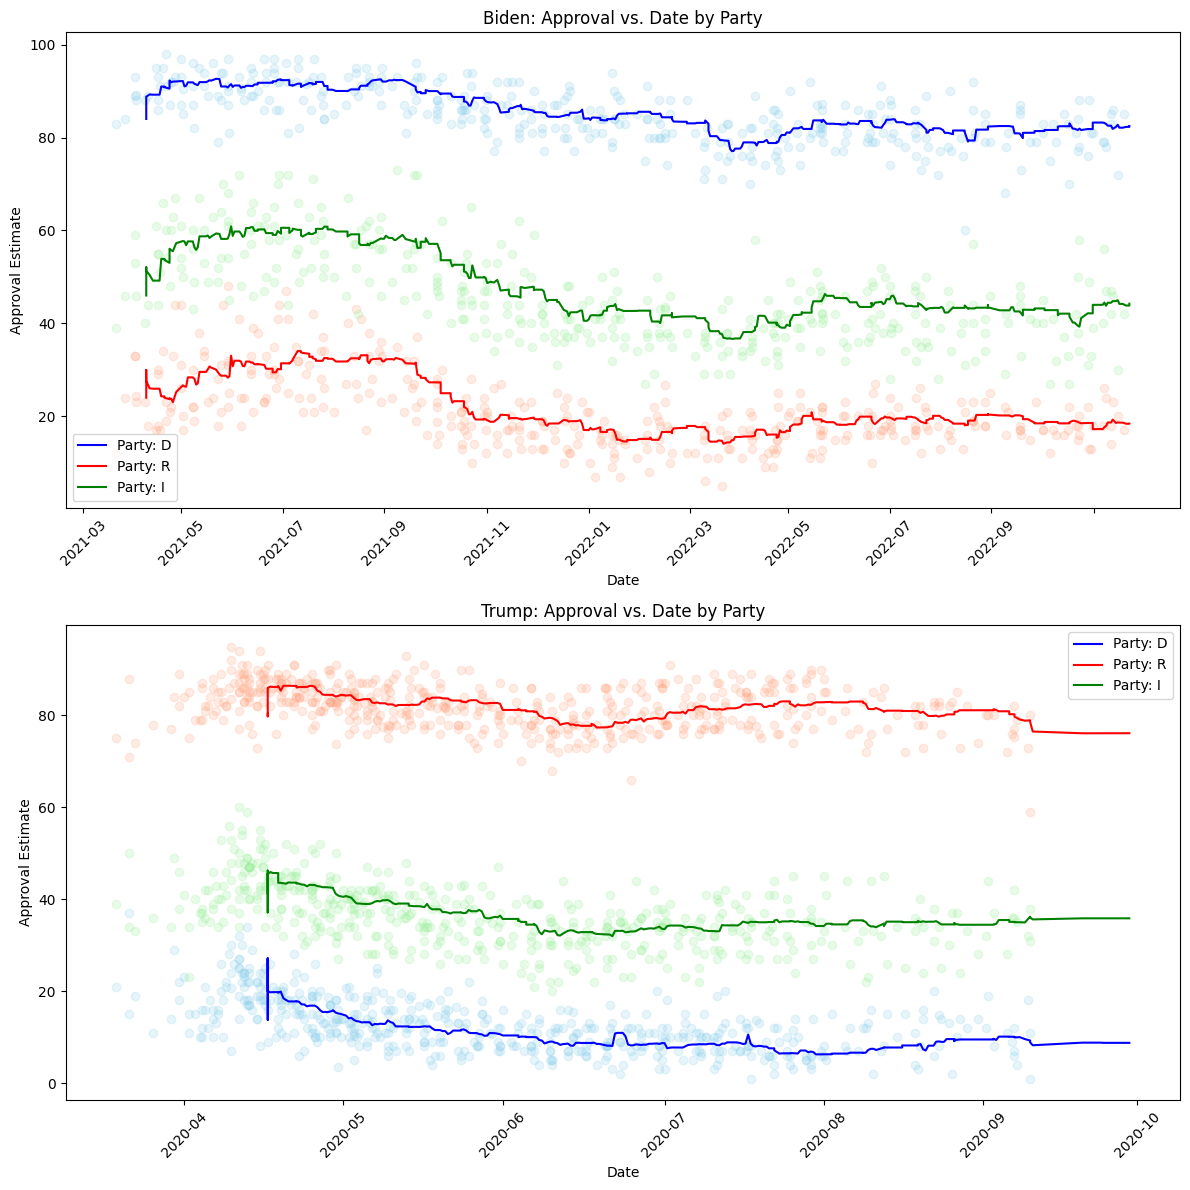

In [73]:


# Original colors
party_colors = {
    'D': 'blue',      # Democrats
    'R': 'red',       # Republicans
    'I': 'green',     # Independents
    'all': 'gray'     # Others
}

# Scatter colors with opacity
party_colors_scatter = {
    'D': '#87CEEB',    # Lighter blue for Democrats
    'R': '#FFA07A',     # Lighter red for Republicans
    'I': '#90EE90',     # Lighter green for Independents
}

# DataFrames
df = dataframes['covid_approval_toplines']
scatter_df = dataframes['covid_approval_polls']

# Extract the date from the "timestamp" column
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# Extract the date from the "end_date" column
scatter_df['date'] = pd.to_datetime(scatter_df['end_date']).dt.date


# Find the biggest date in covid_approval_polls
biggest_date_biden = date(2021, 3, 1)
print(biggest_date_biden)

# Filter data in the covid_approval_toplines dataset
df = df[(df['date'] <= biggest_date_biden) | (df['subject'] != 'Trump')]

# Filter data in the covid_approval_polls dataset
scatter_df = scatter_df[(scatter_df['date'] <= biggest_date_biden) | (scatter_df['subject'] != 'Trump')]


# Create separate figures and axes for Biden and Trump
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot data for Biden on the first plot
for party, color in party_colors.items():
    if party != 'all':
        party_data = df[(df['subject'] == 'Biden') & (df['party'] == party)]
        ax1.plot(party_data['date'], party_data['approve_estimate'], label=f'Party: {party}', color=color)


# Set labels and title for Biden's approval graph
ax1.set_xlabel('Date')
ax1.set_ylabel('Approval Estimate')
ax1.set_title('Biden: Approval vs. Date by Party')
ax1.legend()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Create scatter plots for Biden on the same plot
for party, color in party_colors_scatter.items():
    if party != 'all':
        subset = scatter_df[(scatter_df['subject'] == 'Biden') & (scatter_df['party'] == party)]
        ax1.scatter(subset['date'], subset['approve'], label=f'Biden ({party})', c=color, alpha=0.2)

# Plot data for Trump on the second plot
for party, color in party_colors.items():
    if party != 'all':
        party_data = df[(df['subject'] == 'Trump') & (df['party'] == party)]
        ax2.plot(party_data['date'], party_data['approve_estimate'], label=f'Party: {party}', color=color)

# Set labels and title for Trump's approval graph
ax2.set_xlabel('Date')
ax2.set_ylabel('Approval Estimate')
ax2.set_title('Trump: Approval vs. Date by Party')
ax2.legend()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Create scatter plots for Trump on the same plot
for party, color in party_colors_scatter.items():
    if party != 'all':
        subset = scatter_df[(scatter_df['subject'] == 'Trump') & (scatter_df['party'] == party)]
        ax2.scatter(subset['date'], subset['approve'], label=f'Trump ({party})', c=color, alpha=0.2)

# Adjust layout for both graphs
plt.tight_layout()

# Show the plots
plt.show()


2021-03-01


/var/folders/y5/4ntn99k92d70gksjt9w9jgzr0000gn/T/ipykernel_74409/2845150638.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
/var/folders/y5/4ntn99k92d70gksjt9w9jgzr0000gn/T/ipykernel_74409/2845150638.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


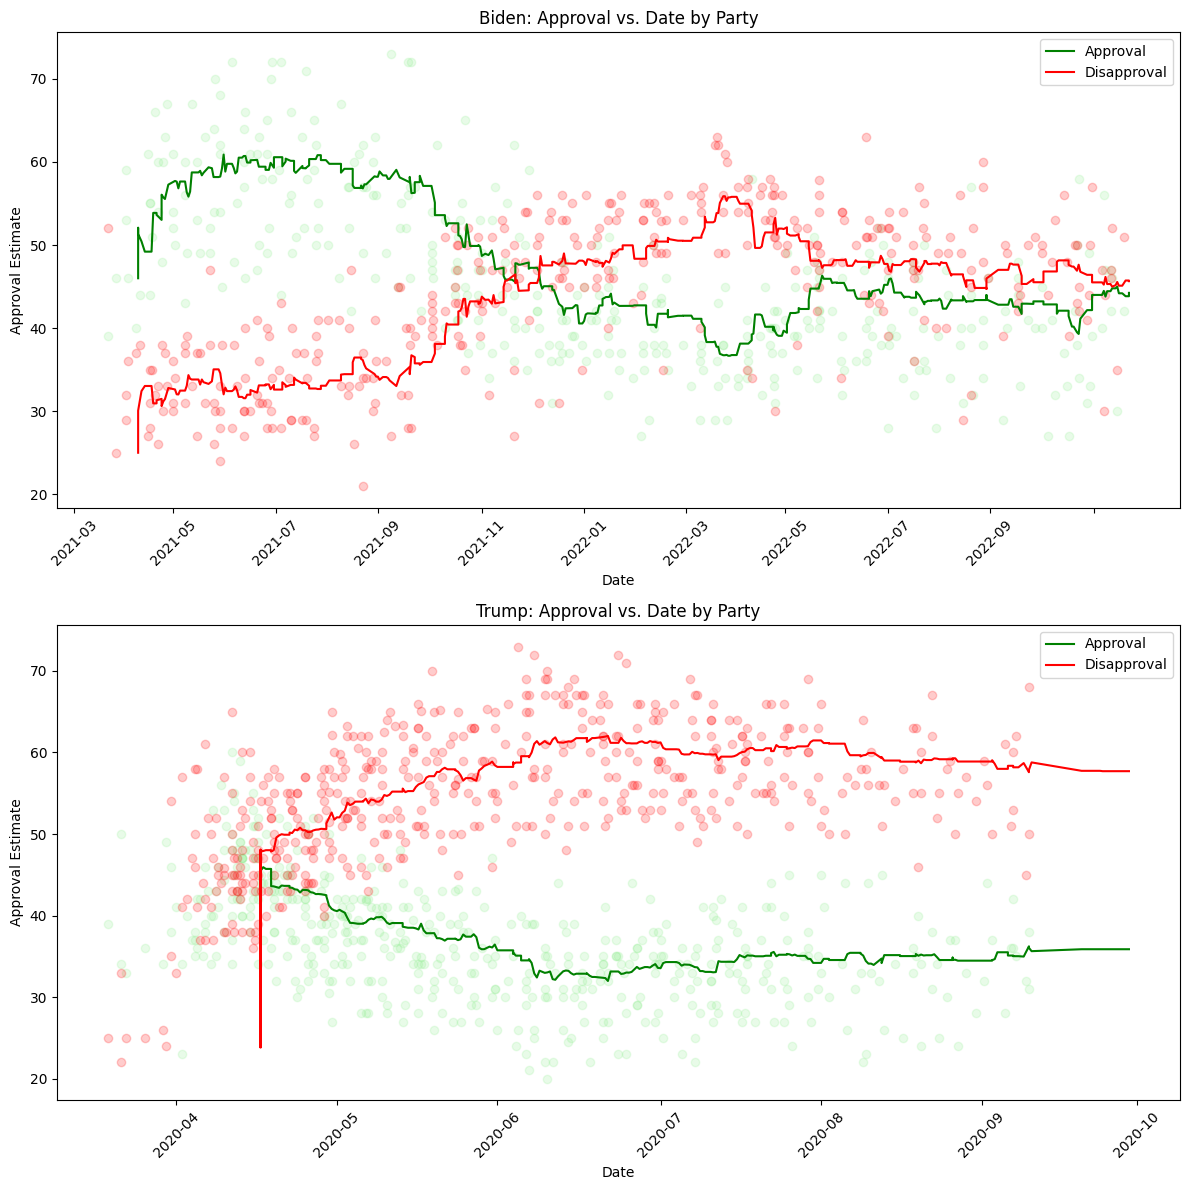

In [76]:


# Original colors
party_colors = {
    'I': 'green',     # Independents
}

# Scatter colors with opacity
party_colors_scatter = {
    'I': '#90EE90',     # Lighter green for Independents
}

# DataFrames
df = dataframes['covid_approval_toplines']
scatter_df = dataframes['covid_approval_polls']

# Extract the date from the "timestamp" column
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# Extract the date from the "end_date" column
scatter_df['date'] = pd.to_datetime(scatter_df['end_date']).dt.date


# Find the biggest date in covid_approval_polls
biggest_date_biden = date(2021, 3, 1)
print(biggest_date_biden)

# Filter data in the covid_approval_toplines dataset
df = df[(df['date'] <= biggest_date_biden) | (df['subject'] != 'Trump')]

# Filter data in the covid_approval_polls dataset
scatter_df = scatter_df[(scatter_df['date'] <= biggest_date_biden) | (scatter_df['subject'] != 'Trump')]


# Create separate figures and axes for Biden and Trump
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot data for Biden on the first plot
for party, color in party_colors.items():
    if party != 'all':
        party_data = df[(df['subject'] == 'Biden') & (df['party'] == party)]
        ax1.plot(party_data['date'], party_data['approve_estimate'], label='Approval', color=color)
# Plot data for Biden on the first plot
for party, color in party_colors.items():
    if party != 'all':
        party_data = df[(df['subject'] == 'Biden') & (df['party'] == party)]
        ax1.plot(party_data['date'], party_data['disapprove_estimate'], label='Disapproval', color='red')


# Set labels and title for Biden's approval graph
ax1.set_xlabel('Date')
ax1.set_ylabel('Approval Estimate')
ax1.set_title('Biden: Approval vs. Date by Party')
ax1.legend()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Create scatter plots for Biden on the same plot
for party, color in party_colors_scatter.items():
    if party != 'all':
        subset = scatter_df[(scatter_df['subject'] == 'Biden') & (scatter_df['party'] == party)]
        ax1.scatter(subset['date'], subset['approve'], c=color, alpha=0.2)
for party, color in party_colors_scatter.items():
    if party != 'all':
        subset = scatter_df[(scatter_df['subject'] == 'Biden') & (scatter_df['party'] == party)]
        ax1.scatter(subset['date'], subset['disapprove'], c='red', alpha=0.2)


# Plot data for Trump on the second plot
for party, color in party_colors.items():
    if party != 'all':
        party_data = df[(df['subject'] == 'Trump') & (df['party'] == party)]
        ax2.plot(party_data['date'], party_data['approve_estimate'], label='Approval', color=color)
for party, color in party_colors.items():
    if party != 'all':
        party_data = df[(df['subject'] == 'Trump') & (df['party'] == party)]
        ax2.plot(party_data['date'], party_data['disapprove_estimate'], label='Disapproval', color='red')


# Set labels and title for Trump's approval graph
ax2.set_xlabel('Date')
ax2.set_ylabel('Approval Estimate')
ax2.set_title('Trump: Approval vs. Date by Party')
ax2.legend()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Create scatter plots for Trump on the same plot
for party, color in party_colors_scatter.items():
    if party != 'all':
        subset = scatter_df[(scatter_df['subject'] == 'Trump') & (scatter_df['party'] == party)]
        ax2.scatter(subset['date'], subset['approve'],c=color, alpha=0.2)
for party, color in party_colors_scatter.items():
    if party != 'all':
        subset = scatter_df[(scatter_df['subject'] == 'Trump') & (scatter_df['party'] == party)]
        ax2.scatter(subset['date'], subset['disapprove'], c='red', alpha=0.2)

# Adjust layout for both graphs
plt.tight_layout()

# Show the plots
plt.show()


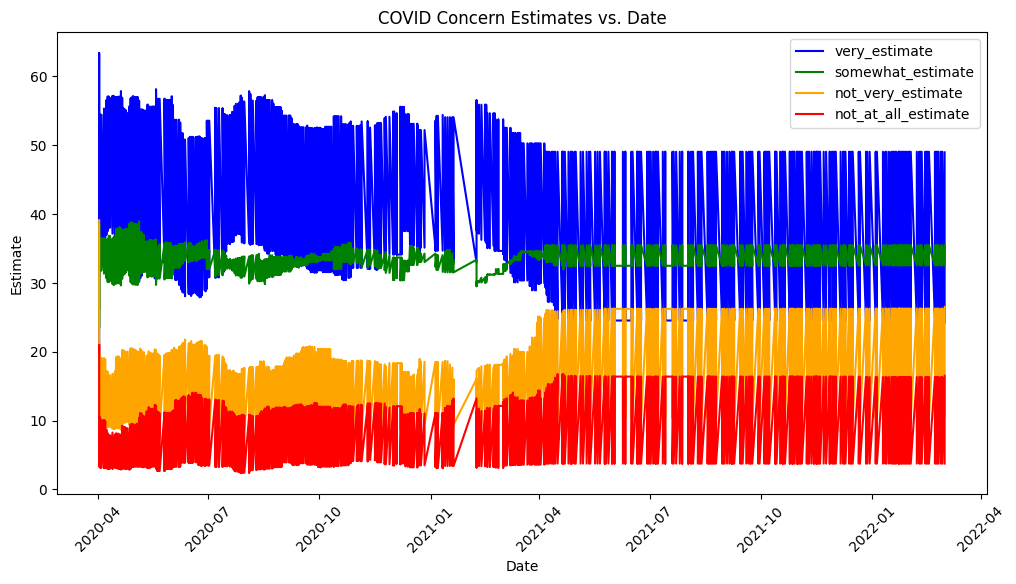

In [79]:
df=dataframes['covid_concern_toplines']
# Assuming you have the DataFrame named df
# Extract the date from the "timestamp" column
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# Define colors for each category
colors = ['blue', 'green', 'orange', 'red']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each category with a different color
for i, column in enumerate(['very_estimate', 'somewhat_estimate', 'not_very_estimate', 'not_at_all_estimate']):
    ax.plot(df['date'], df[column], label=column, color=colors[i])

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Estimate')
ax.set_title('COVID Concern Estimates vs. Date')

# Add a legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

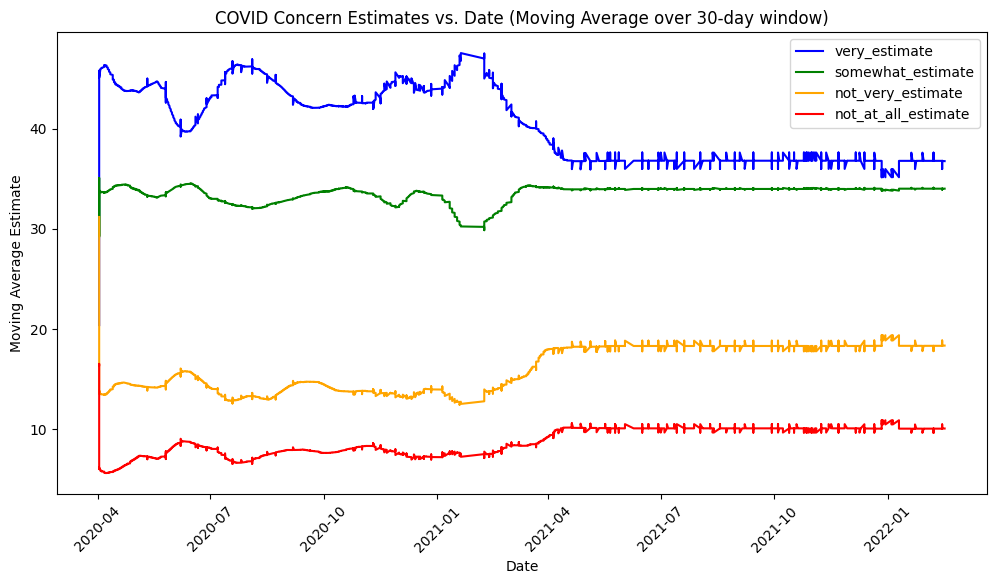

In [81]:

# Assuming you have the DataFrame named df
# Extract the date from the "timestamp" column
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# Define colors for each category
colors = ['blue', 'green', 'orange', 'red']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define a window size for the moving average (3 days in this case)
window_size = 30

# Calculate the moving average for each category
categories = ['very_estimate', 'somewhat_estimate', 'not_very_estimate', 'not_at_all_estimate']
for category in categories:
    df[category + '_MA'] = df[category].rolling(window=window_size).mean()

# Plot the moving averages for each category
for i, category in enumerate(categories):
    ax.plot(df['date'], df[category + '_MA'], label=category, color=colors[i])

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Moving Average Estimate')
ax.set_title(f'COVID Concern Estimates vs. Date (Moving Average over {window_size}-day window)')

# Add a legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()